# Anotações Aprendizagem Supervisionada #

### Utilizando Naive Bayes ###

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### 1.Coleta de Dados: coletando os dados quantitativos e qualitativos referentes; ###

In [20]:
dados = pd.read_csv('./database/adult.csv')
display(dados.head())

,idade,classe-de-trabalho,carac-demografica,educacao,educacao-num,estado-civil,ocupacao,relacionamento,raca,sexo,ganho-capital,perda-capital,horas-por-semana,pais-nativo,renda
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 2.Pré-processamento:dados são adequados ao formato ideal para a manipulação numérica que seguirá;

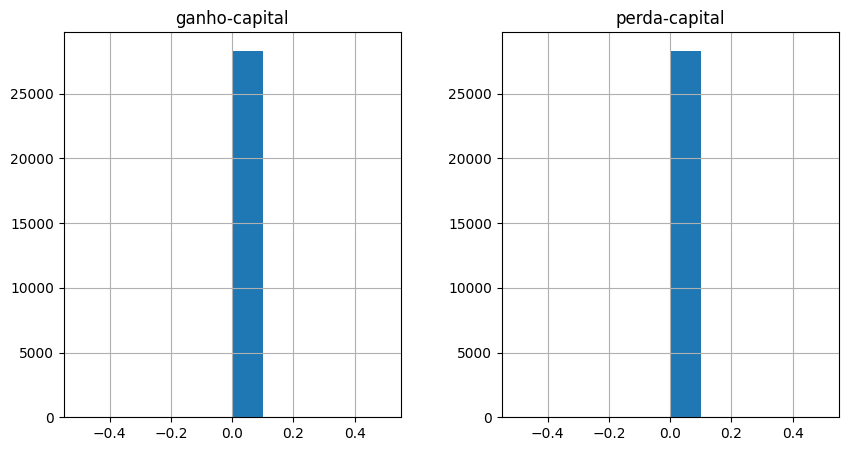

In [21]:
# Funcao para remover outliers

def remove_outliers(df, colunas):
    for col in colunas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]
    return df    

colunas_para_filtar = dados.columns[[10,11]]
dados_sem_outliers =  remove_outliers(dados, colunas_para_filtar)

# mostrando com grafico
dados_sem_outliers.iloc[:,[10,11]].hist(figsize=(10,5))
plt.show()

### Separando a resposta dos atributos nas colunas.
Por que?\
Os atributos serão a "entrada", aquilo que iremos comparar com a reposta, que deve ser a saída esperada\
->tributos como entrada (X).\
->Resposta como saída esperada (y).\
Evita que o modelo "vaze" informações da resposta para os atributos, o que causaria aprendizado incorreto.

In [22]:
# Seleciona todas as linhas (:) e colunas de 0 a 13
atributos = dados.iloc[:, 0:14].values

# Seleciona todas as linhas (:) e apenas a coluna 14
resposta = dados.iloc[:, 14].values

df_atributos = pd.DataFrame(atributos)
df_resposta = pd.DataFrame(resposta)

### Transformando os dados qualitativas nominais e ordinais em variáveis quantitativas
Pra que?\
Fica na linguagem do modelo para que ele possa processar os dados\
Como?\
Importando o LabelEncoder() da biblioteca sklearn.preprocessing\
Fun fact:  LabelEncoder quer dizer “Codificador de etiquetas”, transforma nomes de categorias em números

In [23]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_resposta = LabelEncoder()

resposta = LabelEncoder_resposta.fit_transform(resposta)
df_respota = pd.DataFrame(resposta)
display(df_respota)

,0
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


Transformando os atributos que estão no modo qualitativos em quantitativas discreta com o método fit_transform():

In [24]:
Labelencoder_atributo = LabelEncoder()

atributos[:,1] = Labelencoder_atributo.fit_transform(atributos[:,1])
atributos[:,3] = Labelencoder_atributo.fit_transform(atributos[:,3])
atributos[:,5] = Labelencoder_atributo.fit_transform(atributos[:,5])
atributos[:,6] = Labelencoder_atributo.fit_transform(atributos[:,6])
atributos[:,7] = Labelencoder_atributo.fit_transform(atributos[:,7])
atributos[:,8] = Labelencoder_atributo.fit_transform(atributos[:,8])
atributos[:,9] = Labelencoder_atributo.fit_transform(atributos[:,9])
atributos[:,13] = Labelencoder_atributo.fit_transform(atributos[:,13])

df_atributos = pd.DataFrame(atributos)
display(df_atributos)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39


### 3.Separação para treino e teste: define-se a porção do dataset que será destinada ao treino do algoritmo e qual será destinada a avaliação;
Por que?
Para que o modelo aprenda (treino) com uma parte dos dados e depois teste o desempenho em dados que nunca viu antes (teste).
Assim podemos avalia-lo com parte dos dados iniciais :)

In [25]:
from sklearn.model_selection import train_test_split

# separar em treino 75% e 25% teste 
atributos_treino,atributos_teste, resposta_treino, resposta_teste = train_test_split(atributos, resposta, test_size=0.25, random_state=0)

display(pd.DataFrame(atributos_treino))
display(pd.DataFrame(atributos_teste))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,59,4,61885,2,8,0,14,2,2,1,0,0,35,39
1,71,4,180733,12,14,4,8,1,4,0,0,0,20,39
2,42,4,107762,12,14,2,10,0,4,1,0,0,40,39
3,26,4,35917,11,9,2,12,0,4,1,0,0,40,39
4,46,4,256522,3,2,4,7,3,4,1,0,0,40,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24415,43,2,33331,12,14,2,4,0,4,1,0,0,40,39
24416,44,4,98466,0,6,4,5,4,4,1,0,0,35,39
24417,23,4,45317,15,10,5,12,3,4,0,0,0,40,39
24418,45,2,215862,10,16,2,4,0,4,1,7688,0,45,39


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,27,4,177119,15,10,0,1,4,4,0,0,0,44,39
1,27,4,216481,9,13,4,10,1,4,0,0,0,40,39
2,25,4,256263,7,12,2,12,0,4,1,0,0,40,39
3,46,4,147640,4,3,2,14,0,0,1,0,1902,40,39
4,45,4,172822,1,7,0,14,1,4,1,0,2824,76,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8136,21,4,237651,15,10,4,8,3,4,1,0,0,35,39
8137,63,0,64448,11,9,2,0,0,4,1,0,0,40,39
8138,38,4,229236,11,9,2,14,0,3,1,0,0,40,33
8139,63,4,213095,9,13,2,4,0,4,1,0,0,50,39


Escolhendo o algoritmo: Naive Bayes\

Usamos o Naive Bayes porque ele é simples, rápido, bom com variáveis categóricas e adequado para classificação binária, como neste problema.\

Naive Bayes: Qual é a chance de algo acontecer, dado que outra coisa já aconteceu?\
Classe: ex: “Renda >50K” ou “Renda ≤50K”.\
Atributos: ex: sexo, raça, ocupação, etc 

O algoritmo leva em consideração, então, por exemplo: "Qual a chance da pessoa ganhar >50K dado que ela é homem, branco, casado, etc?"

Pode calcular a probabilidade de três maneiras: Guassian, Bernoulli e Multinomial, cada uma tem suas particulariedades, mas são todas fórmulas

In [26]:
from sklearn.naive_bayes import GaussianNB

#criar o classificador
classificador_bayes = GaussianNB()

#treinar o classificador, .fit literalmente treina, aqui estamos aplicando a fórmula da previsão
classificacao_treino = classificador_bayes.fit(atributos_treino, resposta_treino)

# testar o classificador, .predict faz previsoes, estamos implementando
classificacao_resposta = classificador_bayes.predict(atributos_teste)


### 6.Avaliação: a rotulação de novos dados e avalia-se a performance do algoritmo


In [28]:
# avaliar o classificador
from sklearn.metrics import accuracy_score, confusion_matrix 

# avaliar a acuracia
taxa_de_acerto = accuracy_score(resposta_teste, classificacao_resposta) # retorna entre 1 e 0 referente a taxa de acerto
print("taxa de acerto %: ", taxa_de_acerto*100)


taxa de acerto %:  79.4742660606805


Além da acuracia, utilizaremos a <b>matriz de confusão</b> para saber onde o modelo está errando\

Os 4 cenários possíveis  na matriz:\

✅ Verdadeiro Positivo (TP):
→ O modelo acertou: disse que a renda era >50K, <b>e realmente era</b>.

✅ Verdadeiro Negativo (TN):
→ O modelo acertou: disse que era ≤50K, <b>e realmente era</b>.

❌ Falso Positivo (FP):
→ O modelo errou: disse que era >50K, <b>mas na verdade era ≤50K</b>.

❌ Falso Negativo (FN):
→ O modelo errou: disse que era ≤50K, <b>mas na verdade era >50K</b>.

[[5849  310]
 [1361  621]]


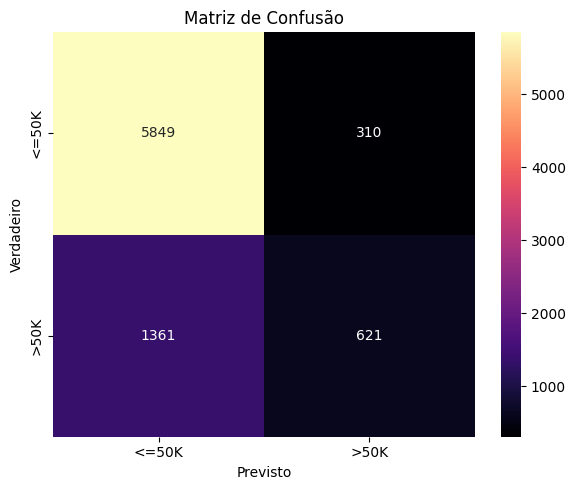

In [29]:
matriz_confusao = confusion_matrix(resposta_teste, classificacao_resposta)
print(matriz_confusao)

# Plotando -  Labels para os eixos (opcional, mas ajuda a leitura)
labels = ['<=50K', '>50K']
plt.figure(figsize=(6, 5))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='magma', 
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.tight_layout()
plt.show()